## Assignment2
----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_orders = pd.read_csv("./datasets/data_orders.csv")
df_orders.head(10)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN
5,21:21:23,-0.947011,51.456380,NaN,3000583117054,9,0,NaN
6,07:58:15,-0.955637,51.470372,NaN,3000582791789,9,0,NaN
7,07:53:46,-0.978230,51.454575,NaN,3000582791562,9,0,NaN
8,08:53:01,-1.052298,51.454308,NaN,3000582817606,9,0,NaN
9,06:33:52,-0.976216,51.433202,NaN,3000582765616,4,0,78.0


In [3]:
df_offers = pd.read_csv("./datasets/data_offers.csv")
df_offers.head(5)

,order_gk,offer_id
0,3000579625629,300050936206
1,3000627306450,300052064651
2,3000632920686,300052408812
3,3000632771725,300052393030
4,3000583467642,300051001196


1. Build up distribution of orders according to reasons for failure: cancellations before and after driver assignment, and reasons for order rejection. Analyse the resulting plot. Which category has the highest number of orders?

In [4]:
order_cancel = df_orders[df_orders["order_status_key"] == 4]
cancel_driver_assigned = order_cancel[order_cancel["is_driver_assigned_key"] == 1]
cancel_driver_unassigned = order_cancel[order_cancel["is_driver_assigned_key"] == 0]
num_cancelled_assigned = len(cancel_driver_assigned)
num_cancelled_unassigned = len(cancel_driver_unassigned)

In [5]:
order_reject = df_orders[df_orders["order_status_key"] == 9]
reject_driver_assigned = order_reject[order_reject["is_driver_assigned_key"] == 1]
reject_driver_unassigned = order_reject[order_reject["is_driver_assigned_key"] == 0]
num_rejected_assigned = len(reject_driver_assigned)
num_rejected_unassigned = len(reject_driver_unassigned)

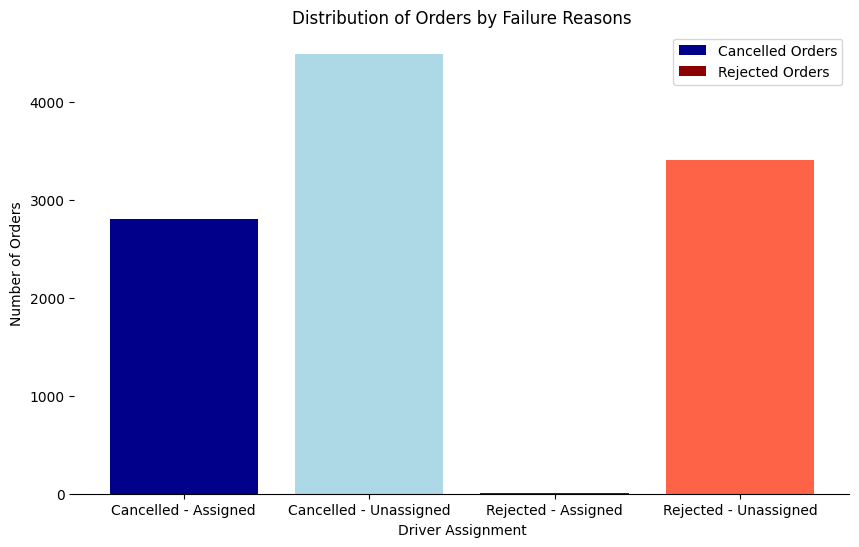

In [6]:
plt.figure(figsize=(10, 6))

colors = ['#8B0000', '#FF6347', '#00008B', '#ADD8E6']

plt.bar(["Cancelled - Assigned", "Cancelled - Unassigned"], [num_cancelled_assigned, num_cancelled_unassigned], color=colors[2:], label='Cancelled Orders')
plt.bar(["Rejected - Assigned", "Rejected - Unassigned"], [num_rejected_assigned, num_rejected_unassigned], color=colors[:2], label='Rejected Orders')
plt.title("Distribution of Orders by Failure Reasons")
plt.xlabel("Driver Assignment")
plt.ylabel("Number of Orders")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.legend()
plt.show()

The cancelled orders that were not assigned a driver have the highest number.

The rejected orders that were  assigned a driver have the lowest number.

2. Plot the distribution of failed orders by hours. Is there a trend that certain hours have an abnormally high proportion of one category or another? What hours are the biggest fails? How can this be explained?

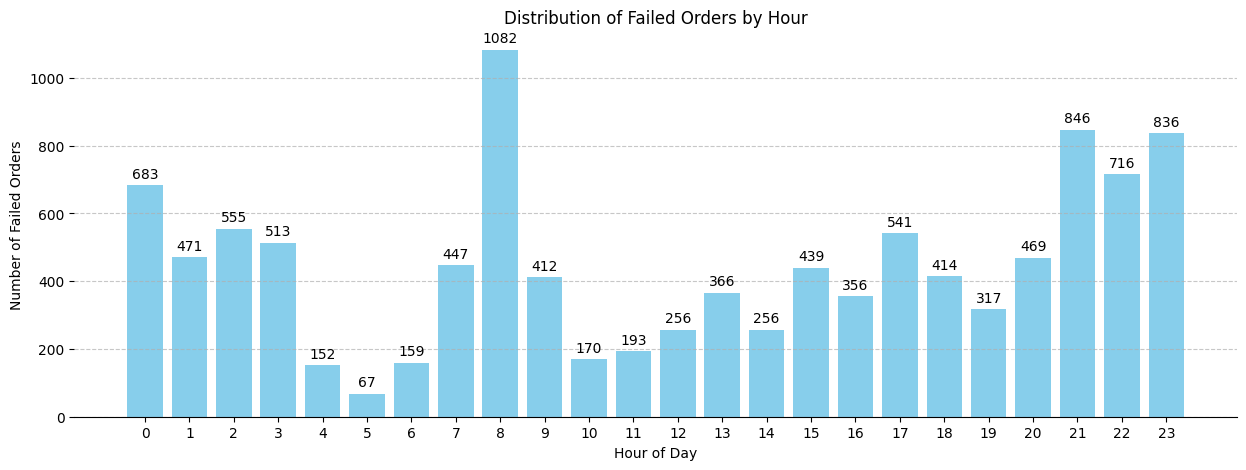

In [7]:
df_orders['order_hour'] = pd.to_datetime(df_orders['order_datetime']).dt.hour
failed_orders_by_hour = df_orders.groupby('order_hour').size()

plt.figure(figsize=(15, 5))
bars = plt.bar(failed_orders_by_hour.index, failed_orders_by_hour, color='skyblue')
plt.title('Distribution of Failed Orders by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Failed Orders')

for bar in bars:
    height = bar.get_height()
    plt.annotate('{:}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom',)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xticks(rotation=0)
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

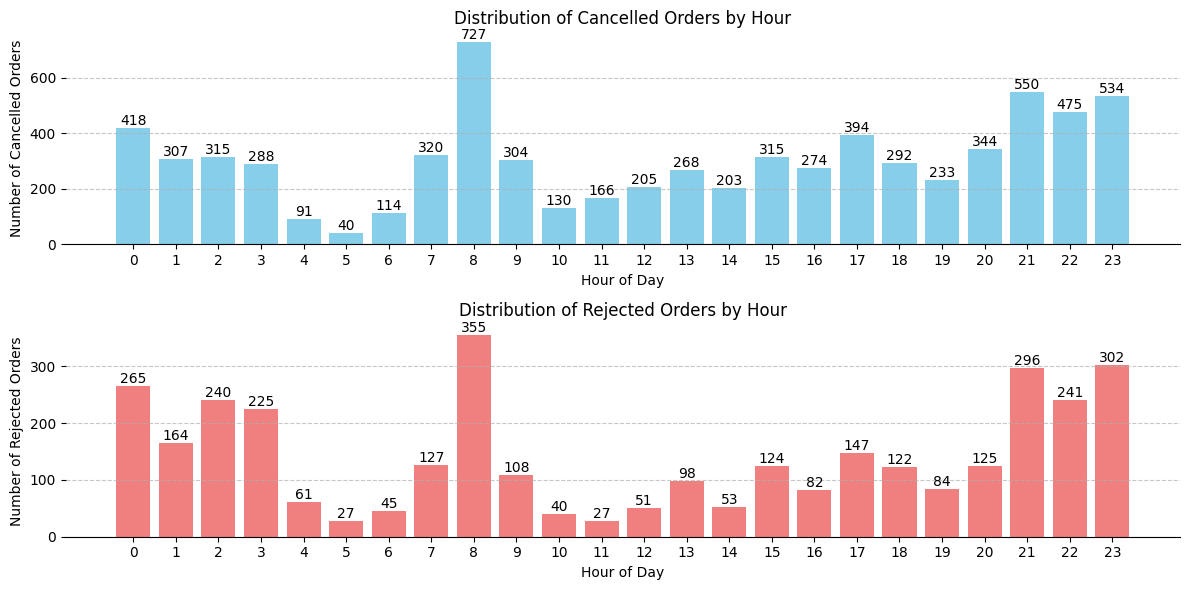

In [8]:
cancelled_orders_by_hour = df_orders[df_orders['order_status_key'] == 4].groupby('order_hour').size()
rejected_orders_by_hour = df_orders[df_orders['order_status_key'] == 9].groupby('order_hour').size()

fig, axes = plt.subplots(2, 1, figsize=(12, 6))

bars_cancelled = axes[0].bar(cancelled_orders_by_hour.index, cancelled_orders_by_hour, color='skyblue')
axes[0].set_title('Distribution of Cancelled Orders by Hour')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Number of Cancelled Orders')
axes[0].set_xticks(range(24))
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['left'].set_visible(False)

for bar in bars_cancelled:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

bars_rejected = axes[1].bar(rejected_orders_by_hour.index, rejected_orders_by_hour, color='lightcoral')
axes[1].set_title('Distribution of Rejected Orders by Hour')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Number of Rejected Orders')
axes[1].set_xticks(range(24))
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)

for bar in bars_rejected:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.tight_layout()
plt.show()

In the morning at 8 o'clock and during the night (from 21:00 to 3:00 the next day), there is a significant increase in the number of both rejected and cancelled orders, with the peak occurring at 8 o'clock in the morning.

The surge in failed orders at 8 o'clock in the morning can be attributed to the rush hour during weekdays, characterized by traffic congestion and insufficient availability of drivers.

During the night, the predominance of failed orders is primarily due to the inconvenience of transportation in night.

3. Plot the average time to cancellation with and without driver, by the hour. If there are any outliers in the data, it would be better to remove them. Can we draw any conclusions from this plot?

In [9]:
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # print(lower_bound, upper_bound)
    return (data >= lower_bound) & (data <= upper_bound)


C:\Users\wyh\AppData\Local\Temp\ipykernel_8080\136773310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_cancel['order_hour'] = pd.to_datetime(order_cancel['order_datetime']).dt.hour


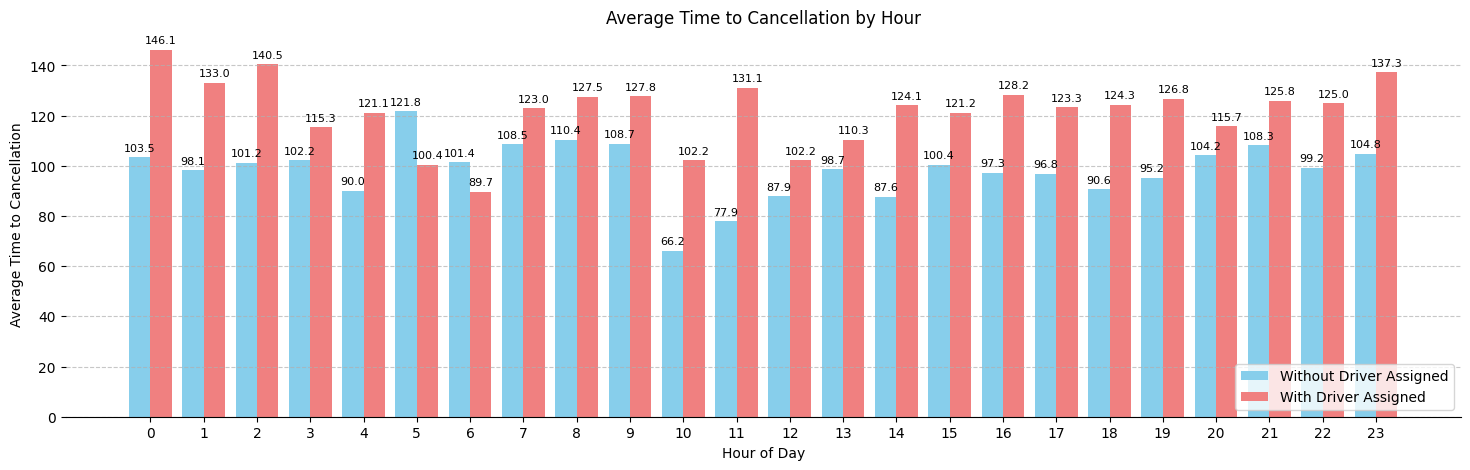

In [10]:
order_cancel['order_hour'] = pd.to_datetime(order_cancel['order_datetime']).dt.hour
order_cancel_common = order_cancel[detect_outliers(order_cancel['cancellations_time_in_seconds'])]

avg_time_to_cancel = order_cancel_common.groupby(['order_hour', 'is_driver_assigned_key'])['cancellations_time_in_seconds'].mean().unstack()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{:.1f}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom',
                     fontsize=8)

plt.figure(figsize=(18, 5))
bar_width = 0.4
bars1 = plt.bar(avg_time_to_cancel.index - bar_width/2, avg_time_to_cancel[0], width=bar_width, color='skyblue', label='Without Driver')
bars2 = plt.bar(avg_time_to_cancel.index + bar_width/2, avg_time_to_cancel[1], width=bar_width, color='lightcoral', label='With Driver')
plt.title('Average Time to Cancellation by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Time to Cancellation')
plt.legend(['Without Driver Assigned', 'With Driver Assigned'], loc="lower right")
plt.xticks(range(24))

add_labels(bars1)
add_labels(bars2)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Generally, the average cancellation time for orders without assigned drivers is lower than those with assigned drivers, except for the time period between five and six o'clock in the morning.

4. Plot the distribution of average ETA by hours. How can this plot be explained?

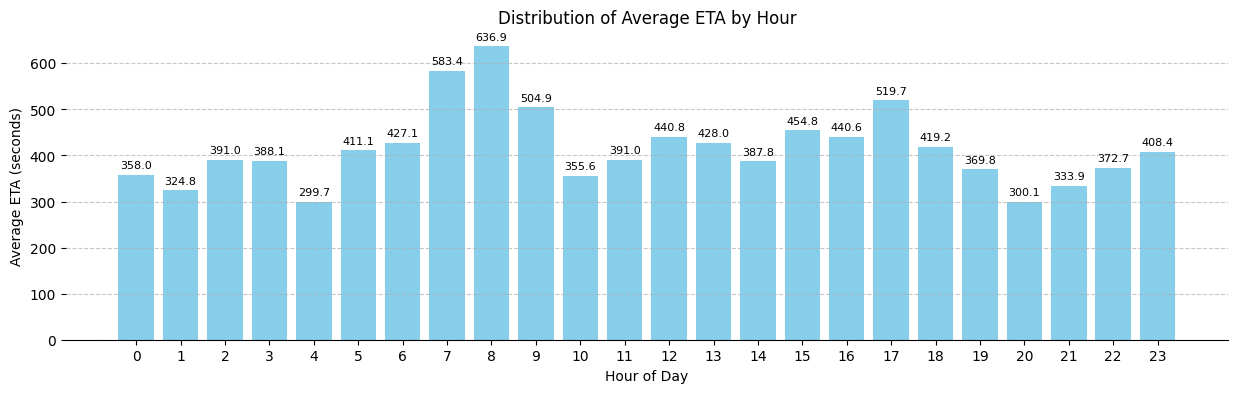

In [11]:
avg_eta_by_hour = df_orders.groupby('order_hour')['m_order_eta'].mean()

plt.figure(figsize=(15, 4))
bar = plt.bar(avg_eta_by_hour.index, avg_eta_by_hour, color='skyblue')
plt.title('Distribution of Average ETA by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average ETA (seconds)')
plt.xticks(range(24))

add_labels(bar)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The average ETA durations from seven to nine in the morning and five in the evening exceed 500 seconds, potentially due to traffic congestion during peak commuting hours.

5. **BONUS** Hexagons. Using the [h3](https://github.com/uber/h3-py) and [folium](https://python-visualization.github.io/folium/latest/) packages, calculate how many sizes [8 hexes](https://h3geo.org/#/documentation/core-library/resolution-table) contain 80% of all orders from the original data sets and visualise the hexes, colouring them by the number of fails on the map.

In [12]:
import h3
import folium

In [18]:
from shapely.geometry import Polygon

resolution = 8

df_orders['hex_id'] = df_orders.apply(lambda row: h3.geo_to_h3(row['origin_latitude'], row['origin_longitude'], resolution), axis=1)
order_counts = df_orders['hex_id'].value_counts()

total_orders = len(df_orders)
cumulative_orders = 0
selected_hexes = []
for hex_id, order_count in order_counts.items():
    cumulative_orders += order_count
    selected_hexes.append(hex_id)
    if cumulative_orders >= total_orders * 0.8:
        break

m = folium.Map(location=[df_orders['origin_latitude'].mean(), df_orders['origin_longitude'].mean()], zoom_start=10)
for hex_id in selected_hexes:
    vertices = h3.h3_to_geo_boundary(hex_id)
    polygon = Polygon(vertices)
    lat_lng = [(vertex[0], vertex[1]) for vertex in polygon.exterior.coords[:-1]]  # Drop the last coordinate which is the same as the first
    folium.Polygon(locations=lat_lng, fill_color='#3388ff', fill_opacity=0.6).add_to(m)

m